**Importing Libraries**

In [50]:
import numpy as np #used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
import matplotlib.pyplot as plt
import os
import torch
from tensorflow import keras
from tensorflow.keras.datasets import mnist #mnist dataser
from tensorflow.keras.models import Sequential #it is a plain stack of Layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers #A Layer consists of a tensor - in tensor - out computation function
from tensorflow.keras.layers import Dense , Flatten
# Faltten - used fot flattening the input or change the dimension
# Dense - Dense Layer is the regular deeply connected in 
from tensorflow.keras.layers import Conv2D , MaxPool2D , Dropout  # conv2d -Convolutional Layer
from tensorflow.keras.optimizers import Adam   #optimizer
from keras.utils import np_utils #used for one - hot encoding

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
%ls /content

digitreg.h5  digitreg.pkl  drive/  model.json  sample_data/


**Getting Data and Pre Process it**

In [55]:
(x_train , y_train),(x_test , y_test) = mnist.load_data() #x contains the images and y has its label, like if its the image of 1 then its label will be 1.
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

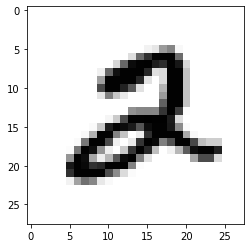

In [56]:
plt.imshow(x_train[5] , cmap = "binary")

In [57]:
# Pre Process the images

#Normalizing the imaeges to [0,1] range
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

#expand the dimensions of the images to (28,28,1)[we use 1 here bcoz the image we take is binary]
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [58]:
#one hot encoding
#[1 will be prensent in the array if that particular image has that value.ex. in 2nd row the second image has value 0 so 1 is present in 0th position]

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

**Model Building**

In [59]:
model = Sequential() #INITIALIZE

model.add(Conv2D(32, (3,3), input_shape = (28,28,1) , activation = "relu"))#(3,3) is the kernal size
model.add(MaxPool2D((2,2))) # (2,2) isthe pool size

model.add(Conv2D(64, (3,3) , activation = "relu"))#(3,3) is the kernal size
model.add(MaxPool2D((2,2))) # (2,2) isthe pool size

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation = "softmax"))#dense is used for classification and 10(numbers from 0-9) is the num of layers.

In [60]:
input_shape = (28,28,1)
model.build(input_shape)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [61]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy , metrics = ['accuracy'])

In [62]:
#callbacks

#EarlyStopping

es = EarlyStopping(monitor = "val_acc", min_delta= 0.01, patience = 5 , verbose= 1)
 
 #Model Checpoint

mc = ModelCheckpoint('./bestmodel.h5' , monitor = "val_acc", verbose = 1, save_best_only = True)
 
cb = [es,mc] 

**Model Training**

In [63]:
his = model.fit(x_train,y_train, epochs = 50, validation_split = 0.3,callbacks = cb)

Epoch 1/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.2182 - accuracy: 0.9335

1313/1313 [==============================] - 59s 45ms/step - loss: 0.2180 - accuracy: 0.9335 - val_loss: 0.1077 - val_accuracy: 0.9665
Epoch 2/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0759 - accuracy: 0.9760

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0759 - accuracy: 0.9760 - val_loss: 0.0567 - val_accuracy: 0.9830
Epoch 3/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0541 - accuracy: 0.9832

1313/1313 [==============================] - 47s 35ms/step - loss: 0.0541 - accuracy: 0.9832 - val_loss: 0.0523 - val_accuracy: 0.9839
Epoch 4/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0439 - accuracy: 0.9859

1313/1313 [==============================] - 45s 35ms/step - loss: 0.0438 - accuracy: 0.9859 - val_loss: 0.0508 - val_accuracy: 0.9848
Epoch 5/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0374 - accuracy: 0.9879

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.0418 - val_accuracy: 0.9873
Epoch 6/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0325 - accuracy: 0.9895

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0325 - accuracy: 0.9895 - val_loss: 0.0413 - val_accuracy: 0.9880
Epoch 7/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0285 - accuracy: 0.9905

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0285 - accuracy: 0.9905 - val_loss: 0.0431 - val_accuracy: 0.9875
Epoch 8/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0247 - accuracy: 0.9922

1313/1313 [==============================] - 45s 35ms/step - loss: 0.0247 - accuracy: 0.9922 - val_loss: 0.0423 - val_accuracy: 0.9884
Epoch 9/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0211 - accuracy: 0.9930

1313/1313 [==============================] - 45s 34ms/step - loss: 0.0211 - accuracy: 0.9930 - val_loss: 0.0373 - val_accuracy: 0.9901
Epoch 10/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0200 - accuracy: 0.9930

1313/1313 [==============================] - 45s 35ms/step - loss: 0.0200 - accuracy: 0.9930 - val_loss: 0.0429 - val_accuracy: 0.9884
Epoch 11/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0180 - accuracy: 0.9939

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0179 - accuracy: 0.9940 - val_loss: 0.0423 - val_accuracy: 0.9890
Epoch 12/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9946

1313/1313 [==============================] - 45s 35ms/step - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.0404 - val_accuracy: 0.9898
Epoch 13/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0150 - accuracy: 0.9950

1313/1313 [==============================] - 45s 34ms/step - loss: 0.0150 - accuracy: 0.9950 - val_loss: 0.0439 - val_accuracy: 0.9894
Epoch 14/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0144 - accuracy: 0.9953

1313/1313 [==============================] - 47s 36ms/step - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0.0480 - val_accuracy: 0.9880
Epoch 15/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 0.9959

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0129 - accuracy: 0.9959 - val_loss: 0.0472 - val_accuracy: 0.9889
Epoch 16/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0136 - accuracy: 0.9956

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.0433 - val_accuracy: 0.9897
Epoch 17/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 0.9963

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0109 - accuracy: 0.9963 - val_loss: 0.0435 - val_accuracy: 0.9895
Epoch 18/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9954

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0124 - accuracy: 0.9954 - val_loss: 0.0413 - val_accuracy: 0.9903
Epoch 19/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0092 - accuracy: 0.9967

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0092 - accuracy: 0.9967 - val_loss: 0.0499 - val_accuracy: 0.9888
Epoch 20/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0105 - accuracy: 0.9964

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0105 - accuracy: 0.9964 - val_loss: 0.0430 - val_accuracy: 0.9906
Epoch 21/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0101 - accuracy: 0.9964

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0101 - accuracy: 0.9964 - val_loss: 0.0437 - val_accuracy: 0.9903
Epoch 22/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0083 - accuracy: 0.9968

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0083 - accuracy: 0.9968 - val_loss: 0.0501 - val_accuracy: 0.9887
Epoch 23/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0094 - accuracy: 0.9966

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0094 - accuracy: 0.9966 - val_loss: 0.0442 - val_accuracy: 0.9903
Epoch 24/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0087 - accuracy: 0.9969

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.0511 - val_accuracy: 0.9897
Epoch 25/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.9967

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0090 - accuracy: 0.9967 - val_loss: 0.0503 - val_accuracy: 0.9901
Epoch 26/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0079 - accuracy: 0.9974

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0569 - val_accuracy: 0.9886
Epoch 27/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0073 - accuracy: 0.9974

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0073 - accuracy: 0.9974 - val_loss: 0.0508 - val_accuracy: 0.9899
Epoch 28/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0079 - accuracy: 0.9972

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0079 - accuracy: 0.9972 - val_loss: 0.0512 - val_accuracy: 0.9902
Epoch 29/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9975

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0074 - accuracy: 0.9975 - val_loss: 0.0517 - val_accuracy: 0.9899
Epoch 30/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0078 - accuracy: 0.9974

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.0554 - val_accuracy: 0.9895
Epoch 31/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9976

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.0606 - val_accuracy: 0.9895
Epoch 32/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9972

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.0603 - val_accuracy: 0.9891
Epoch 33/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9978

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.0532 - val_accuracy: 0.9903
Epoch 34/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0056 - accuracy: 0.9980

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0056 - accuracy: 0.9980 - val_loss: 0.0547 - val_accuracy: 0.9890
Epoch 35/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9976

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0065 - accuracy: 0.9976 - val_loss: 0.0559 - val_accuracy: 0.9896
Epoch 36/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9975

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0066 - accuracy: 0.9975 - val_loss: 0.0563 - val_accuracy: 0.9903
Epoch 37/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0070 - accuracy: 0.9978

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.0531 - val_accuracy: 0.9909
Epoch 38/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9978

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0061 - accuracy: 0.9978 - val_loss: 0.0588 - val_accuracy: 0.9903
Epoch 39/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.9979

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0643 - val_accuracy: 0.9890
Epoch 40/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0059 - accuracy: 0.9979

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0059 - accuracy: 0.9979 - val_loss: 0.0561 - val_accuracy: 0.9903
Epoch 41/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.9977

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0064 - accuracy: 0.9977 - val_loss: 0.0600 - val_accuracy: 0.9897
Epoch 42/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 0.9975

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0072 - accuracy: 0.9975 - val_loss: 0.0604 - val_accuracy: 0.9894
Epoch 43/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 0.9982

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0048 - accuracy: 0.9982 - val_loss: 0.0598 - val_accuracy: 0.9899
Epoch 44/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0055 - accuracy: 0.9983

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0055 - accuracy: 0.9983 - val_loss: 0.0579 - val_accuracy: 0.9905
Epoch 45/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0049 - accuracy: 0.9982

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.0605 - val_accuracy: 0.9902
Epoch 46/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0058 - accuracy: 0.9982

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.0588 - val_accuracy: 0.9897
Epoch 47/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9986

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.0648 - val_accuracy: 0.9896
Epoch 48/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 0.9977

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0579 - val_accuracy: 0.9899
Epoch 49/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0057 - accuracy: 0.9978

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0057 - accuracy: 0.9978 - val_loss: 0.0625 - val_accuracy: 0.9902
Epoch 50/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9988

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0033 - accuracy: 0.9987 - val_loss: 0.0587 - val_accuracy: 0.9910


In [64]:
#save the model

model.save("digitreg.h5")
model_path = "/content/drive/MyDrive/digitreg.h5"
model_s = keras.models.load_model( "/content/digitreg.h5")

In [65]:
#model evalutaion/ accuracy

score = model_s.evaluate(x_test, y_test)
print(f"the model accuracy is {score[1]} ")
print(f"the model loss is {score[0]} ")

313/313 [==============================] - 4s 11ms/step - loss: 0.0397 - accuracy: 0.9926
the model accuracy is 0.9926000237464905 
the model loss is 0.03968239203095436 
